Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    return pd.read_csv(file)

def exercise_1(df):
    return list(df)

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    return df.sample(n=k)

def exercise_4(df):
    return df['type'].unique()

def exercise_5(df):
    return df['nameDest'].value_counts().head(10)

def exercise_6(df):
    return df[df['isFraud'] == 1]

def exercise_7(df):
    pass

def visual_1(df):
    pass

def visual_2(df):
    pass

def exercise_custom(df):
    pass
    
def visual_custom(df):
    pass

In [98]:
df = exercise_0('transactions.csv')

In [99]:
# Test exercises here
exercise_1(df)
exercise_2(df, 8)
exercise_3(df, 6)
exercise_4(df)
exercise_5(df)
exercise_6(df)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
182862,13,CASH_OUT,408.00,C1894004688,408.00,0.0,C1293978242,898297.85,1075854.14,1,0
193765,13,TRANSFER,48375.02,C920803432,48375.02,0.0,C1767389067,0.00,0.00,1,0
193766,13,CASH_OUT,48375.02,C1894578299,48375.02,0.0,C590035788,374803.26,658520.33,1,0
196775,13,TRANSFER,4022667.54,C735463888,4022667.54,0.0,C1548348754,0.00,0.00,1,0


Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

"The number of transactions varies based on the data, but what's important is that fraud only happens in CASH_OUT and TRANSFER transactions. This helps management know where to focus their manual reviews, which can reduce missed fraud"

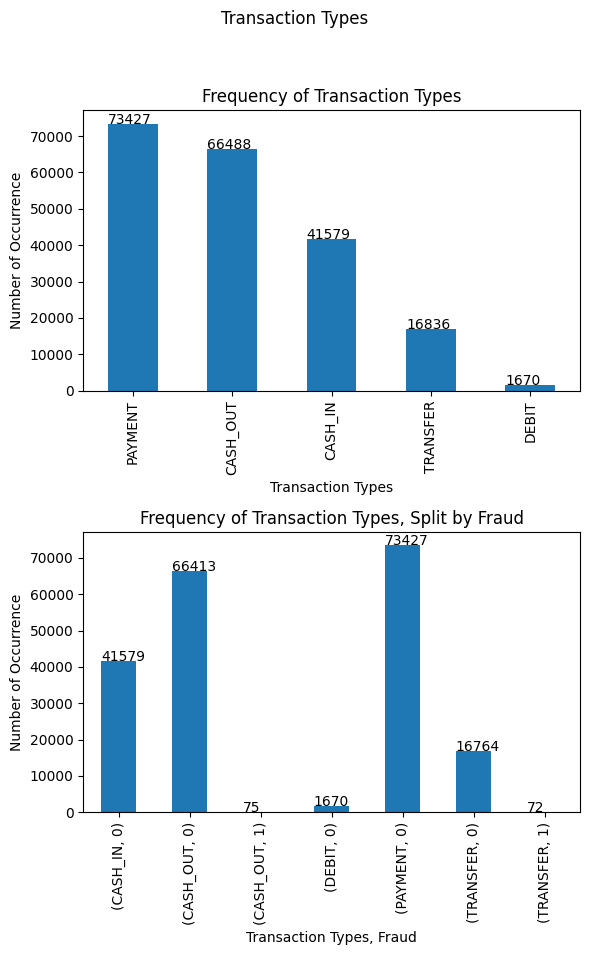

In [100]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df):
        return df.groupby(by=['type', 'isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Frequency of Transaction Types')
    axs[0].set_xlabel('Transaction Types')
    axs[0].set_ylabel('Number of Occurrence')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Frequency of Transaction Types, Split by Fraud')
    axs[1].set_xlabel('Transaction Types, Fraud')
    axs[1].set_ylabel('Number of Occurrence')
    fig.suptitle('Transaction Types')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return "The number of transactions varies based on the data, but what's important is that fraud only happens in CASH_OUT and TRANSFER transactions. This helps management know where to focus their manual reviews, which can reduce missed fraud"

visual_1(df)


"A cash out happens when someone takes out money. It's good to see activity in only two of the four sections because if all four had activity, it would mean there's a problem with the data. The y=-x line is especially important because it shows instant settlement"

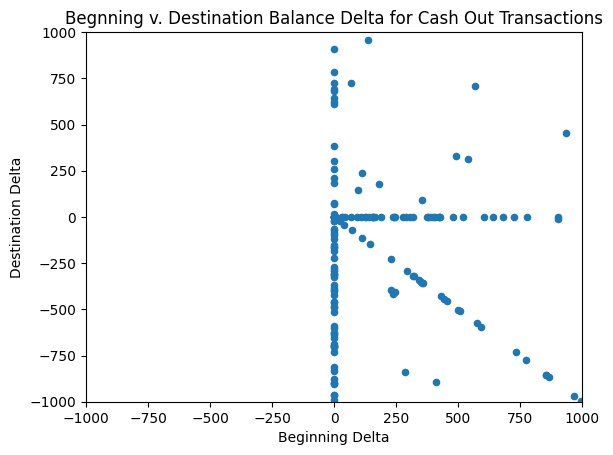

In [101]:
def visual_2(df):
    def query(df):
        df['Beginning Delta'] = df['oldbalanceOrg'] -	df['newbalanceOrig']
        df['Destination Delta'] = df['oldbalanceDest'] -	df['newbalanceDest']
        return df[df['type']=='CASH_OUT']
    plot = query(df).plot.scatter(x='Beginning Delta',y='Destination Delta')
    plot.set_title('Begnning v. Destination Balance Delta for Cash Out Transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return "A cash out happens when someone takes out money. It's good to see activity in only two of the four sections because if all four had activity, it would mean there's a problem with the data. The y=-x line is especially important because it shows instant settlement"

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

"Here, we see that the fraud detection system misses almost all the fraud. However, it doesn't give any false alarms. This might mean that the system only reports fraud when it's very sure about it"

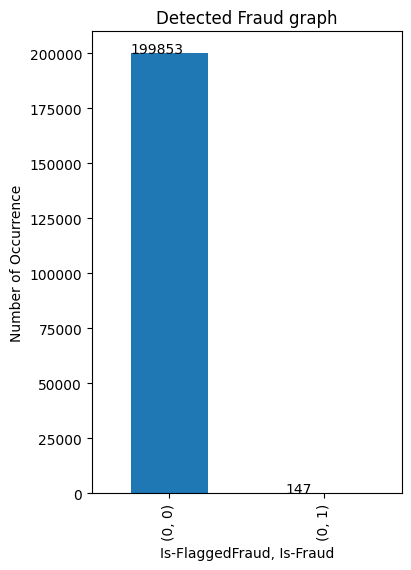

In [102]:
def exercise_custom(df):
    return df[['isFlaggedFraud', 'isFraud']].value_counts()
    
def visual_custom(df):
    fig, ax = plt.subplots(1, figsize=(4,6))
    exercise_custom(df).plot(ax=ax, kind='bar')
    ax.set_title('Detected Fraud graph')
    ax.set_xlabel('Is-FlaggedFraud, Is-Fraud')
    ax.set_ylabel('Number of Occurrence')
    for i in ax.patches:
        ax.annotate(i.get_height(), (i.get_x(), i.get_height()))
    return "Here, we see that the fraud detection system misses almost all the fraud. However, it doesn't give any false alarms. This might mean that the system only reports fraud when it's very sure about it"

visual_custom(df)

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.